In [1]:
from misc import sample_images_with_labels, LoadLungImages, get_probabilities, display_side_by_side
from train import CNNClassification, ShallowResNetClassification, ShallowMobileNetClassification
from Dataloaders import CreateDataLoaders
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from visualisation import *
import numpy as np
import os

In [2]:
# Load data - please change the path to your local path
path = "/Users/antanas/GitRepo/PnuPred/PnuData/chest_xray/"

X_train, y_train = LoadLungImages(os.path.join(path, "train"))
X_test, y_test = LoadLungImages(os.path.join(path, "test"))
X_val, y_val = LoadLungImages(os.path.join(path, "val"))

X_train = X_train + X_val
y_train = y_train + y_val

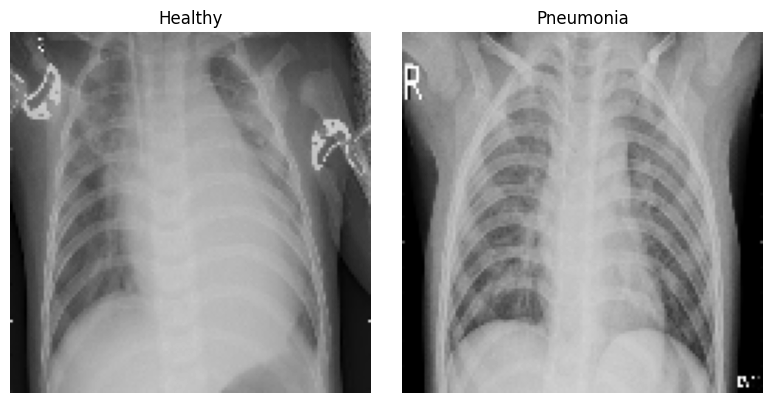

In [18]:

pos_img, pos_label = sample_images_with_labels(X_test, y_test, label = 1, num_samples = 1)
neg_img, neg_label = sample_images_with_labels(X_test, y_test, label = 0, num_samples = 1)
images = pos_img + neg_img  # define your image data here
labels = pos_label + neg_label  # define your labels here

display_side_by_side(pos_img, neg_img, n=1)

In [3]:
# Train CNN and ShallowResNet models
cnn_model, cnn_loss_list, cnn_acc_list, cnn_test_accuracy, cnn_auc, cnn_fpr, cnn_tpr, cnn_f1_score = CNNClassification(X_train, y_train, X_test, y_test, num_epochs=10, learning_rate=0.001, batch_size=32, preprocess=False)
resnet_model, resnet_loss_list, resnet_acc_list, resnet_test_accuracy, resnet_auc, resnet_fpr, resnet_tpr, resnet_f1_score = ShallowResNetClassification(X_train, y_train, X_test, y_test, num_epochs=10, learning_rate=0.001, batch_size=32, preprocess=False)
mobilenet_model, mobilenet_loss_list, mobilenet_acc_list, mobilenet_test_accuracy, mobilenet_auc, mobilenet_fpr, mobilenet_tpr, mobilenet_f1_score = ShallowMobileNetClassification(X_train, y_train, X_test, y_test, num_epochs=10, learning_rate=0.001, batch_size=32, preprocess=False)

Test Accuracy of the model on the 10000 test images: 73.3974358974359 %
AUC: 0.8614
Test Accuracy of the model on the 10000 test images: 84.77564102564102 %
AUC: 0.9271
Test Accuracy of the model on the 10000 test images: 84.61538461538461 %
AUC: 0.9194


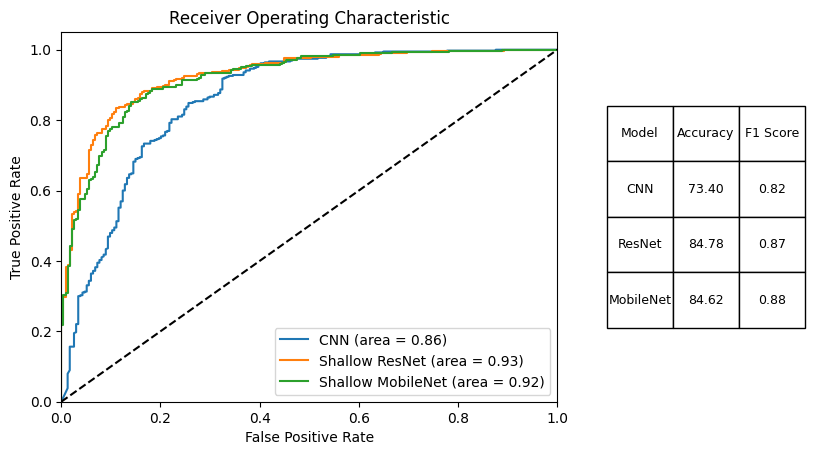

In [14]:
# Plot the ROC curve
plt.figure()
plt.plot(cnn_fpr, cnn_tpr, label='CNN (area = {:.2f})'.format(cnn_auc))
plt.plot(resnet_fpr, resnet_tpr, label='Shallow ResNet (area = {:.2f})'.format(resnet_auc))
plt.plot(mobilenet_fpr, mobilenet_tpr, label='Shallow MobileNet (area = {:.2f})'.format(mobilenet_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Add table with accuracy and F1 scores
cell_text = [['CNN', '{:.2f}'.format(cnn_test_accuracy), '{:.2f}'.format(cnn_f1_score)],
             ['ResNet', '{:.2f}'.format(resnet_test_accuracy), '{:.2f}'.format(resnet_f1_score)],
             ['MobileNet', '{:.2f}'.format(mobilenet_test_accuracy), '{:.2f}'.format(mobilenet_f1_score)]]
table = plt.table(cellText=cell_text, colLabels=['Model', 'Accuracy', 'F1 Score'],
                  loc='center right', bbox=[1.1, 0.2, 0.4, 0.6])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)

# Center the text in the table cells
for cell in table.get_celld().values():
    cell.set_text_props(horizontalalignment="center")

plt.show()

### Integrated-Gradients

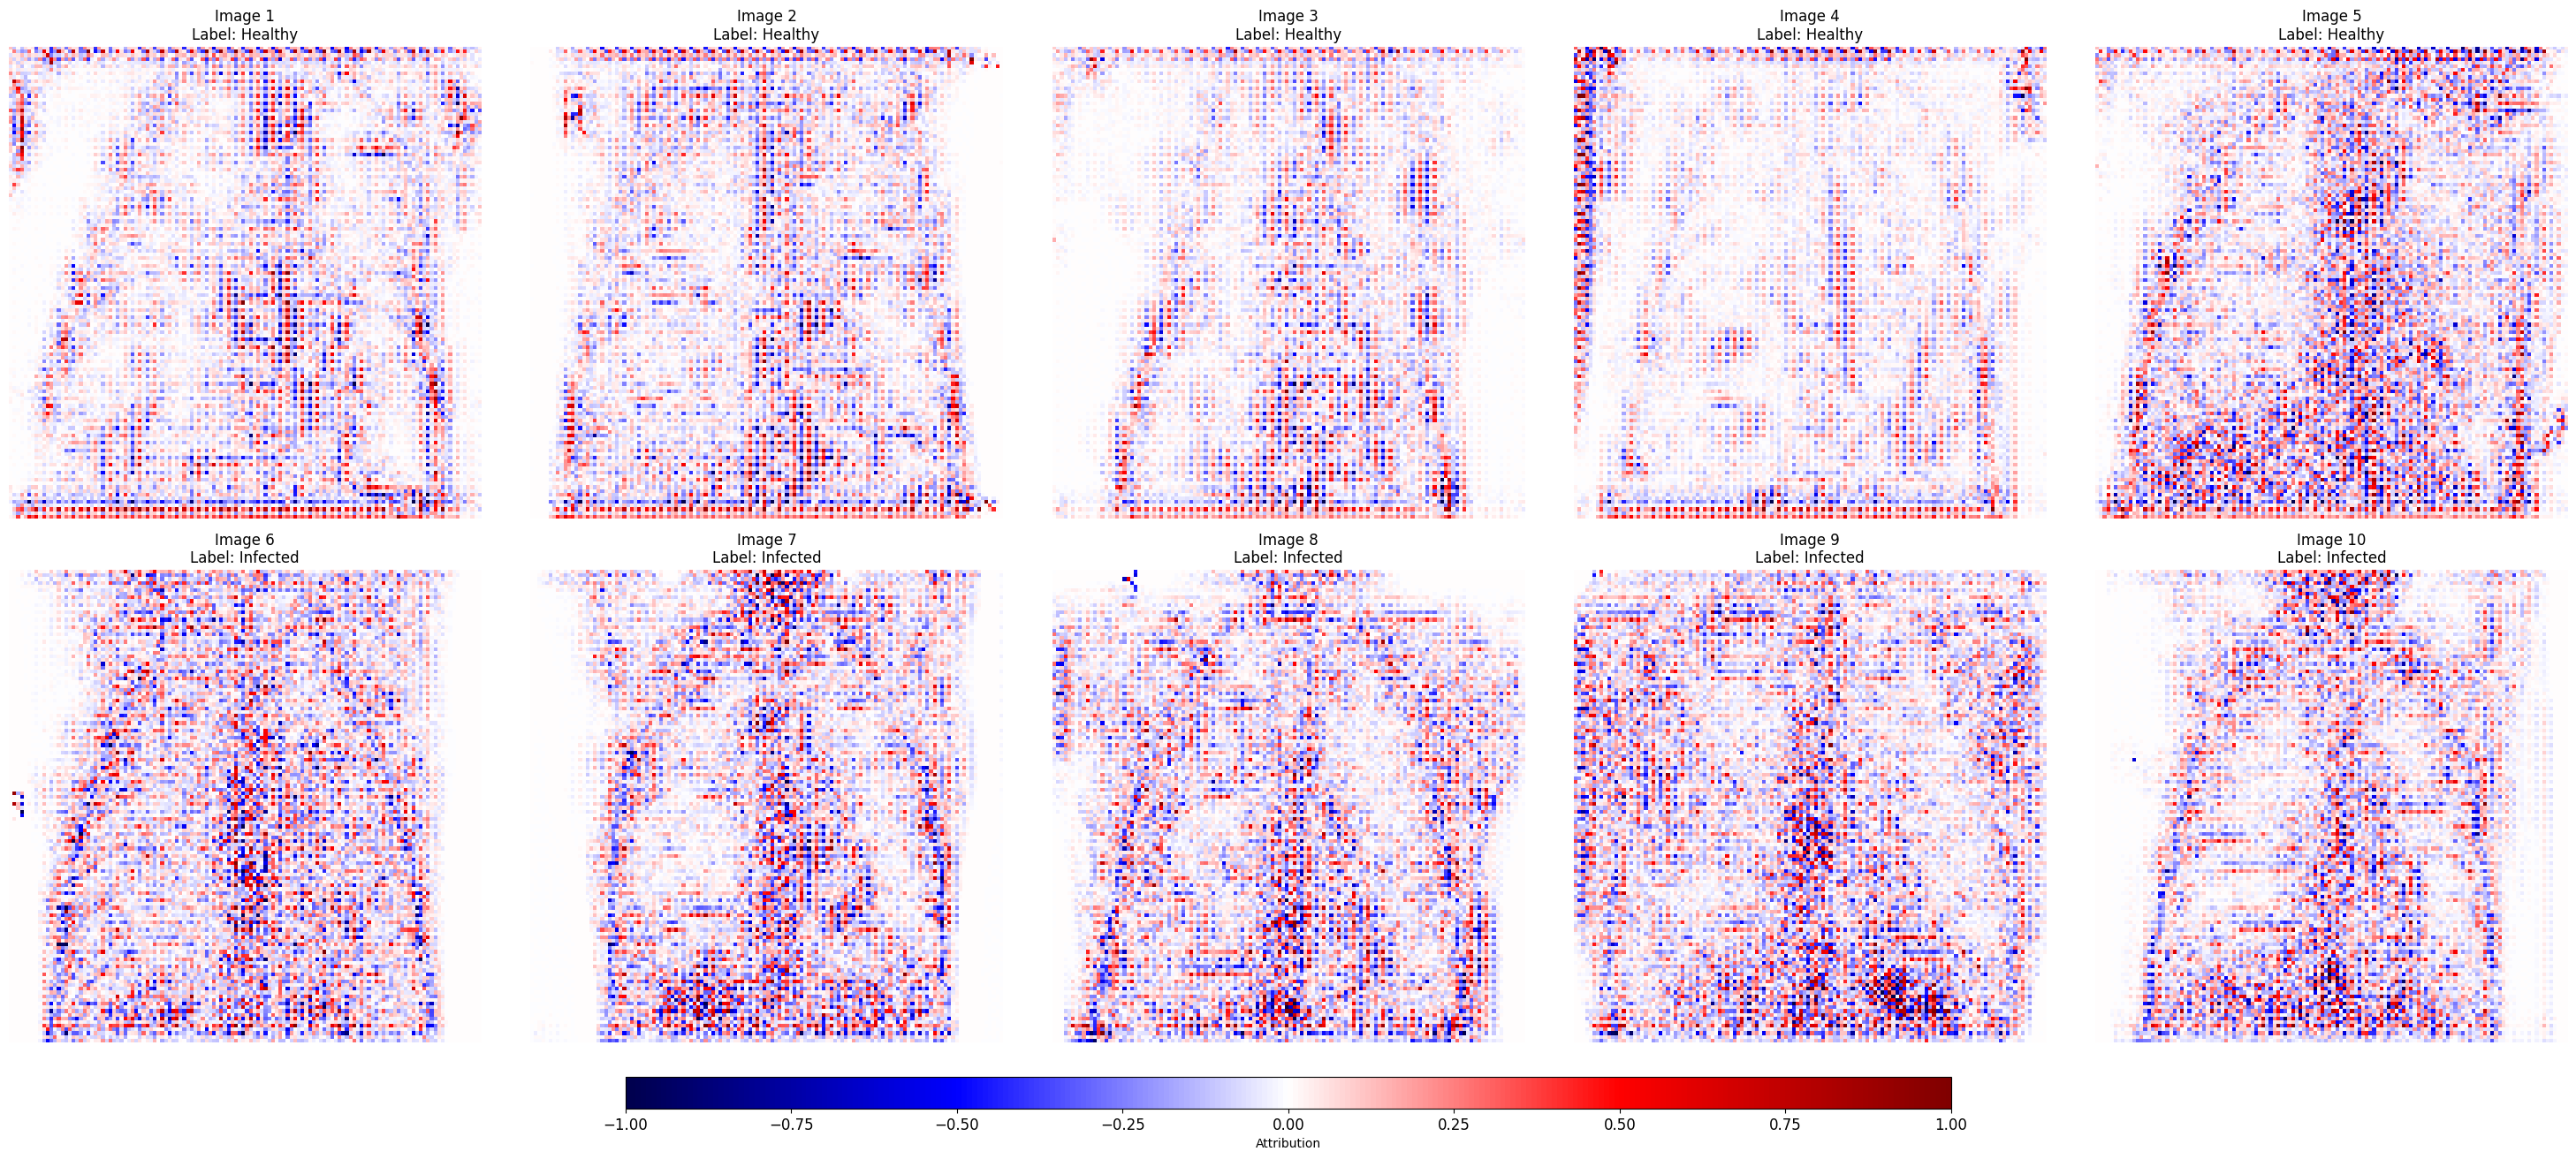

In [6]:
figure, axis = visualize_attributions_panel(mobilenet_model, images, labels, sign = 'all')

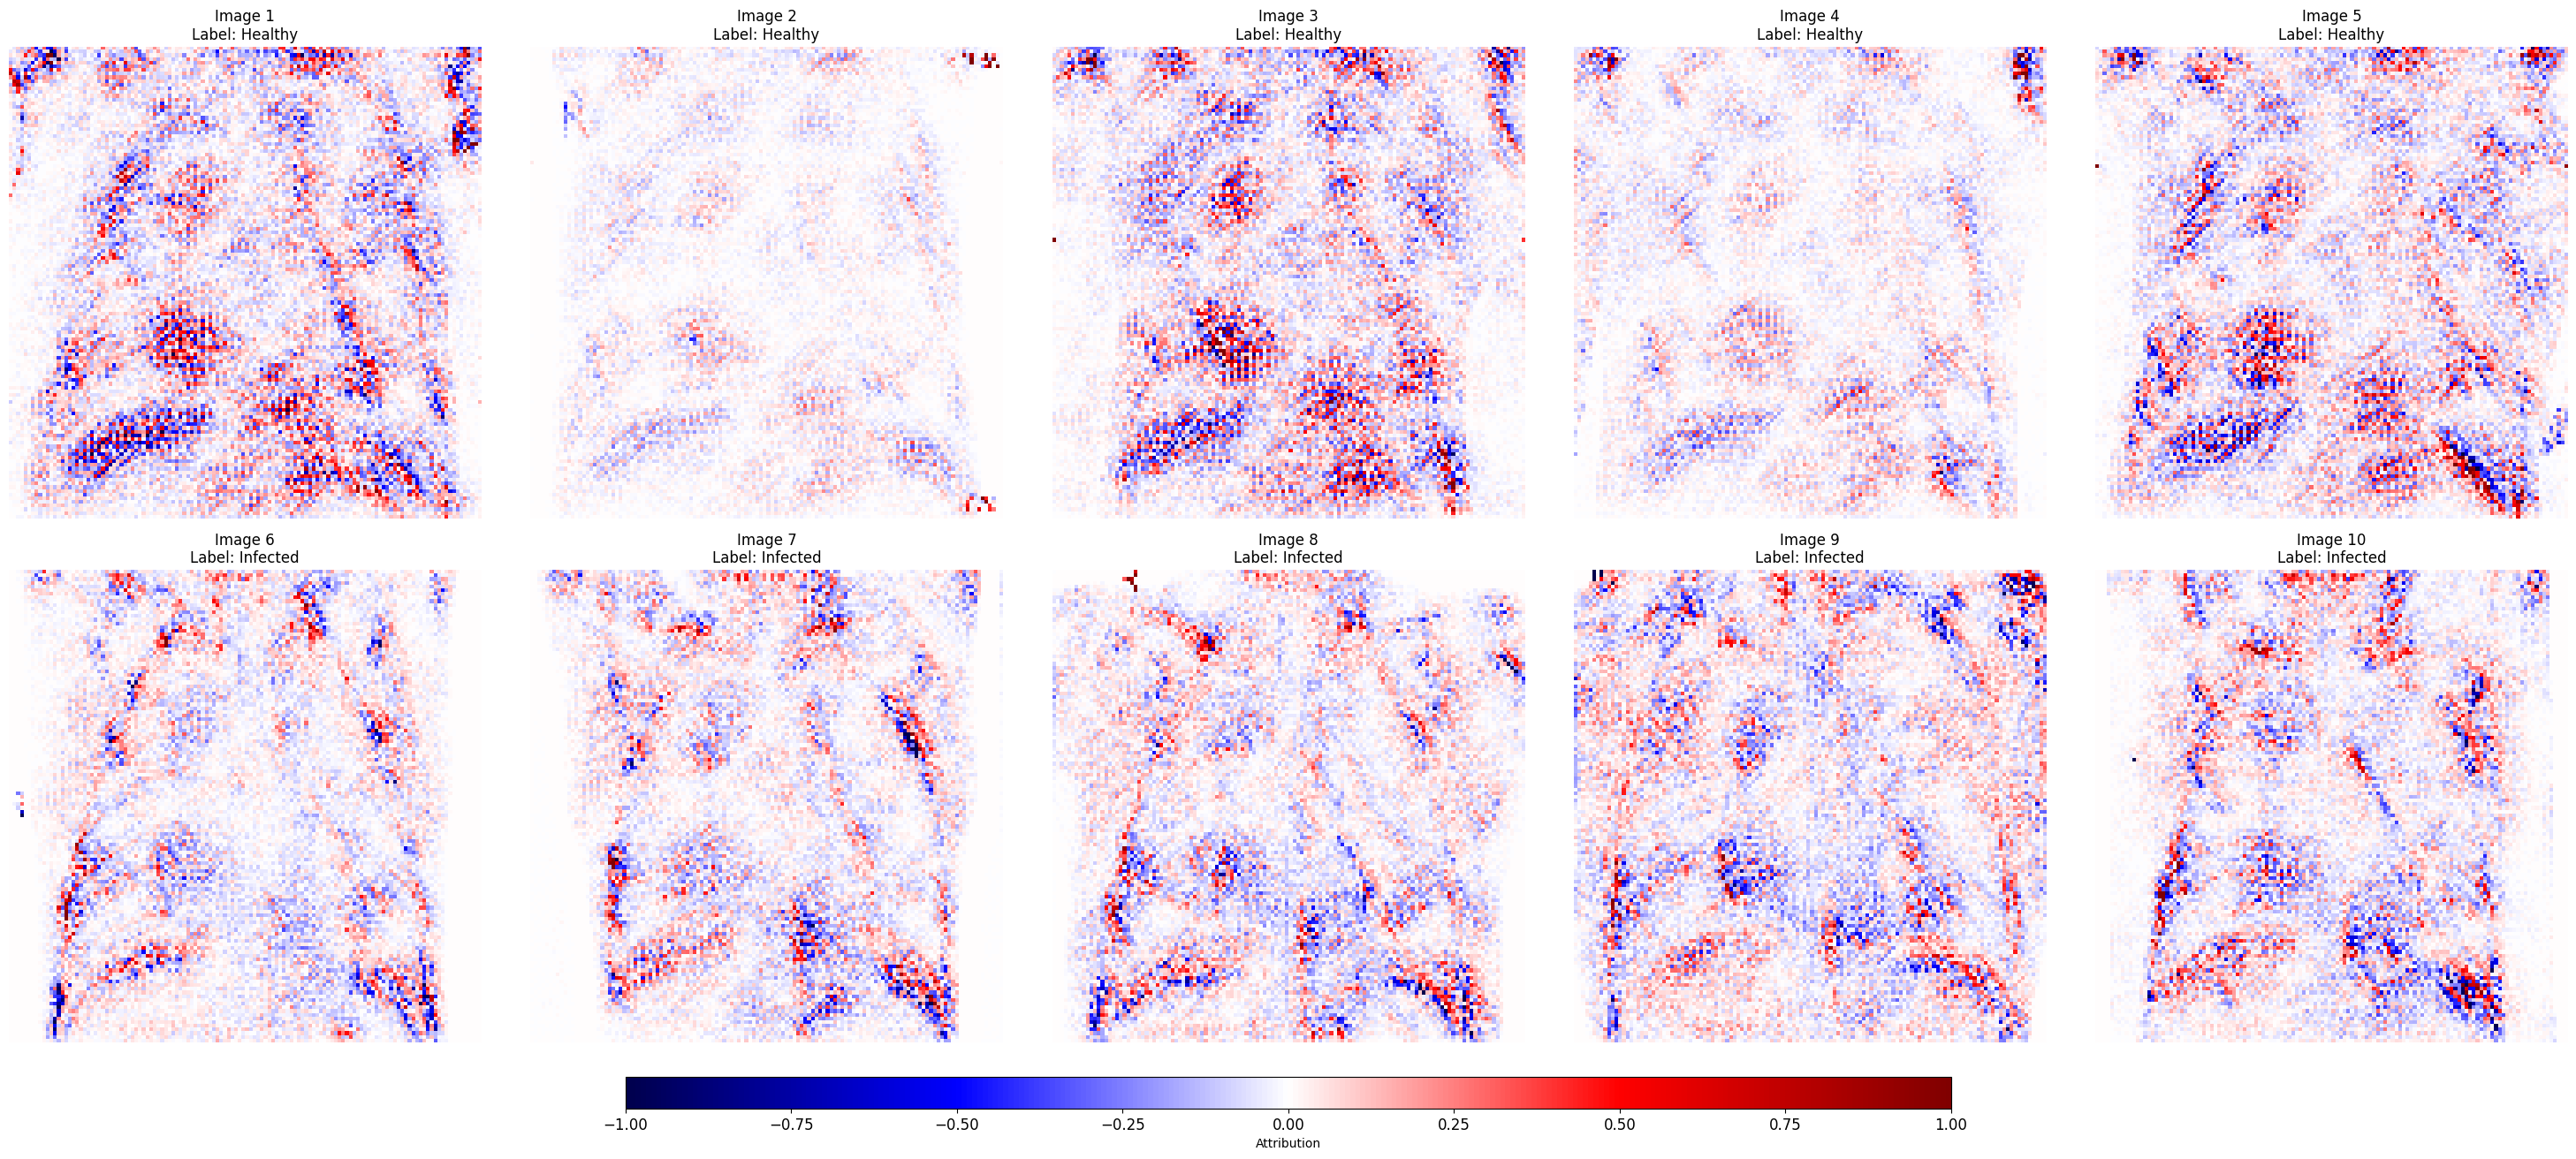

In [7]:
figure, axis = visualize_attributions_panel(cnn_model, images, labels, sign = 'all')

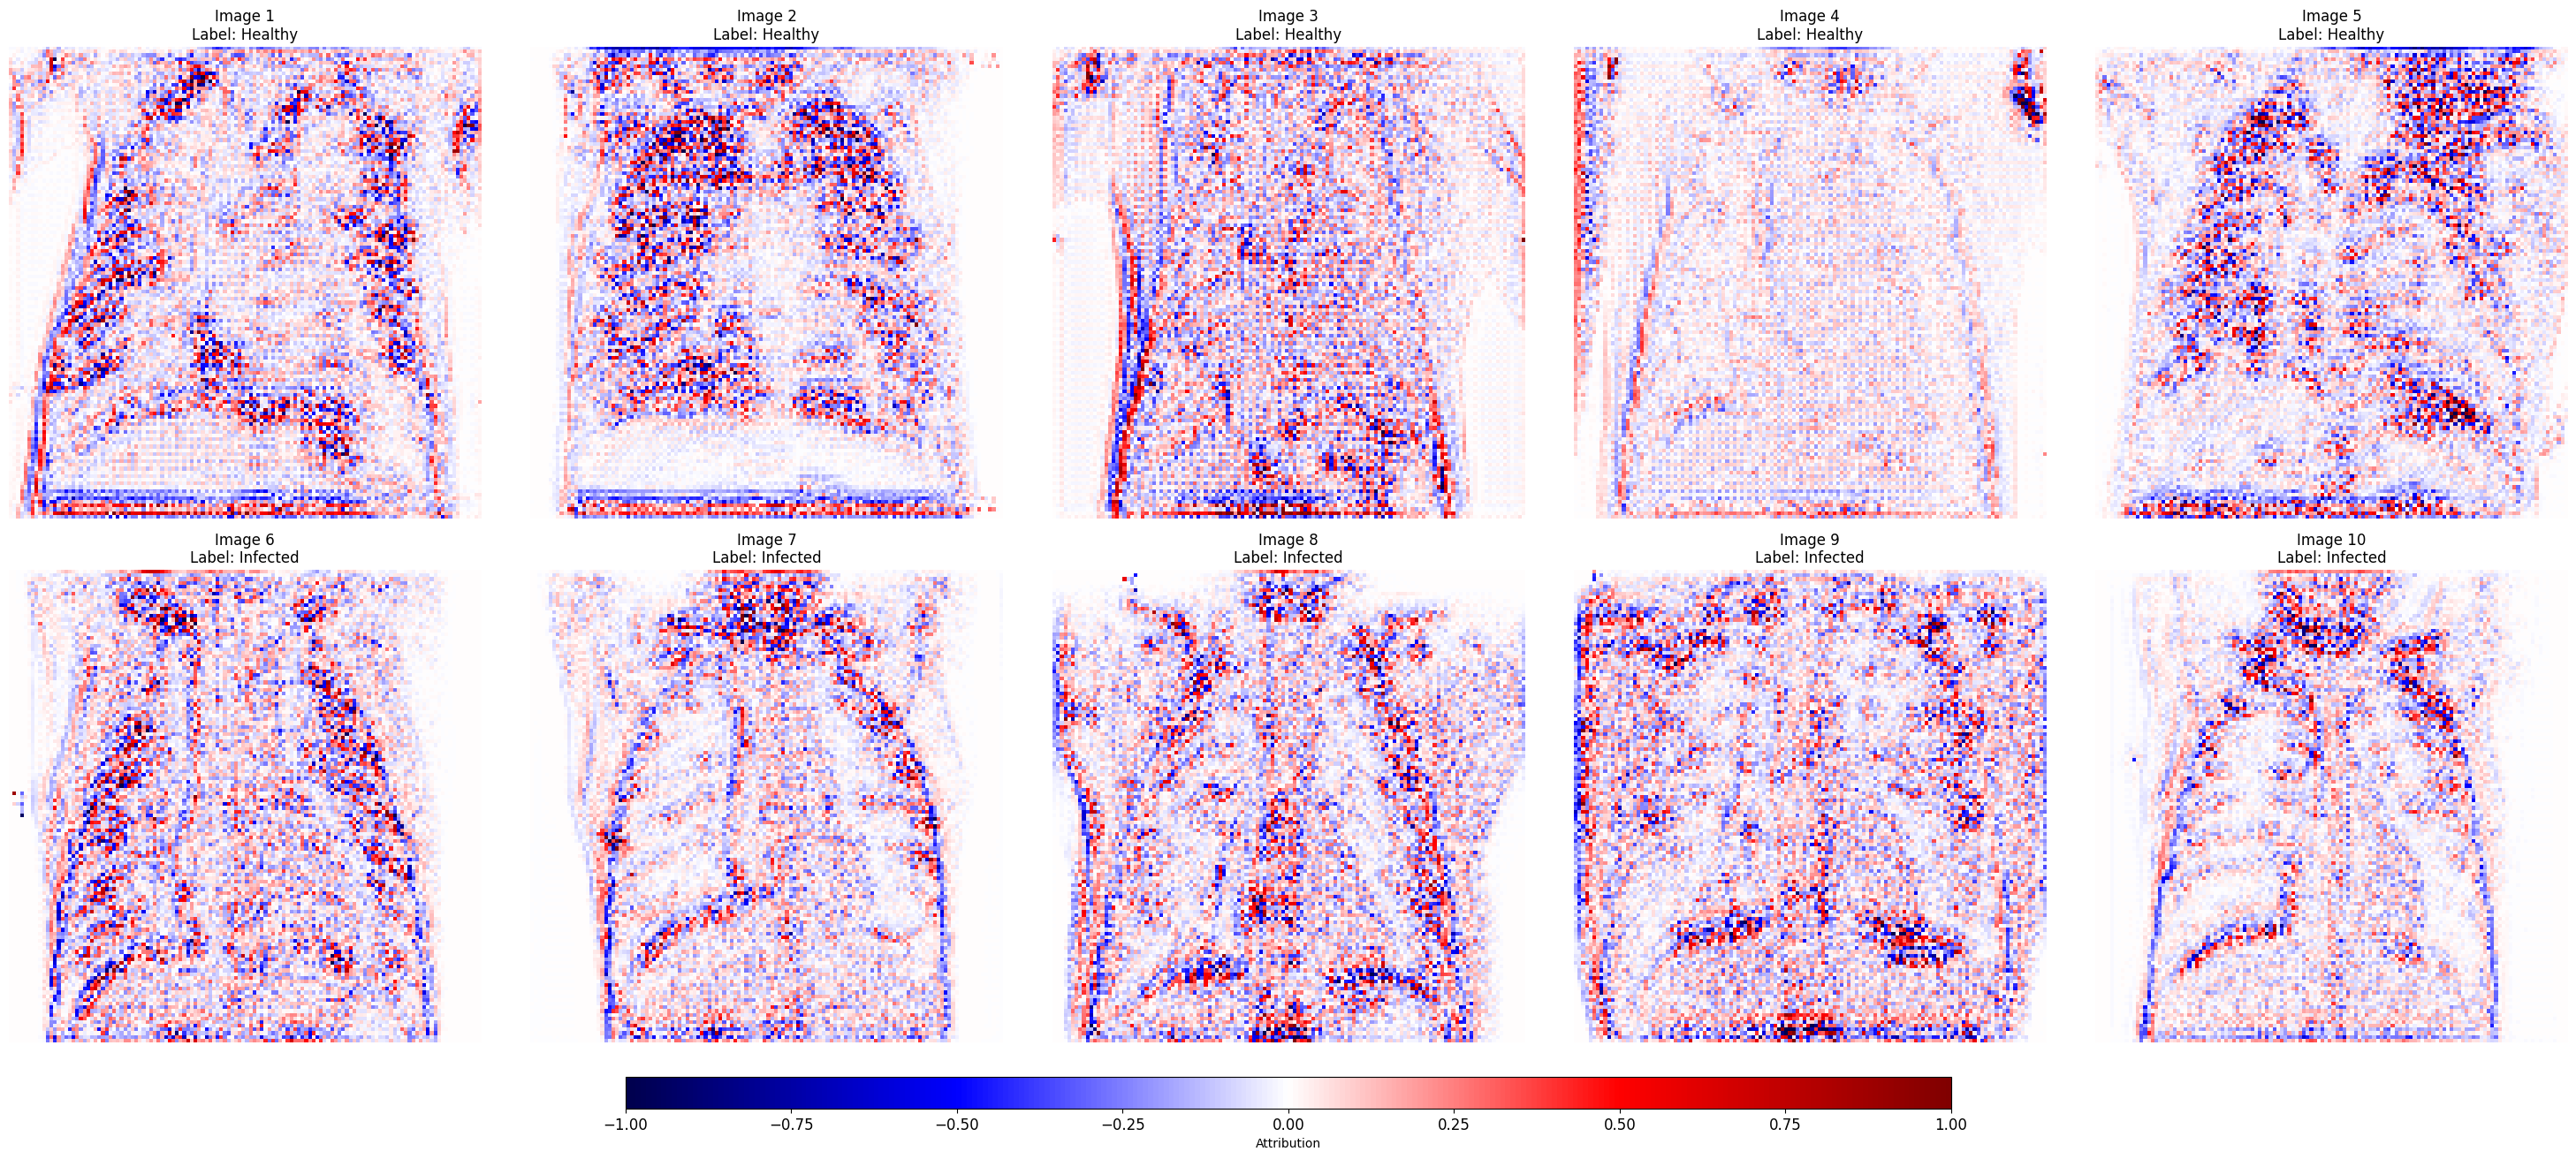

In [8]:
figure, axis = visualize_attributions_panel(resnet_model, images, labels, sign = 'all')

### Grad-CAM

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


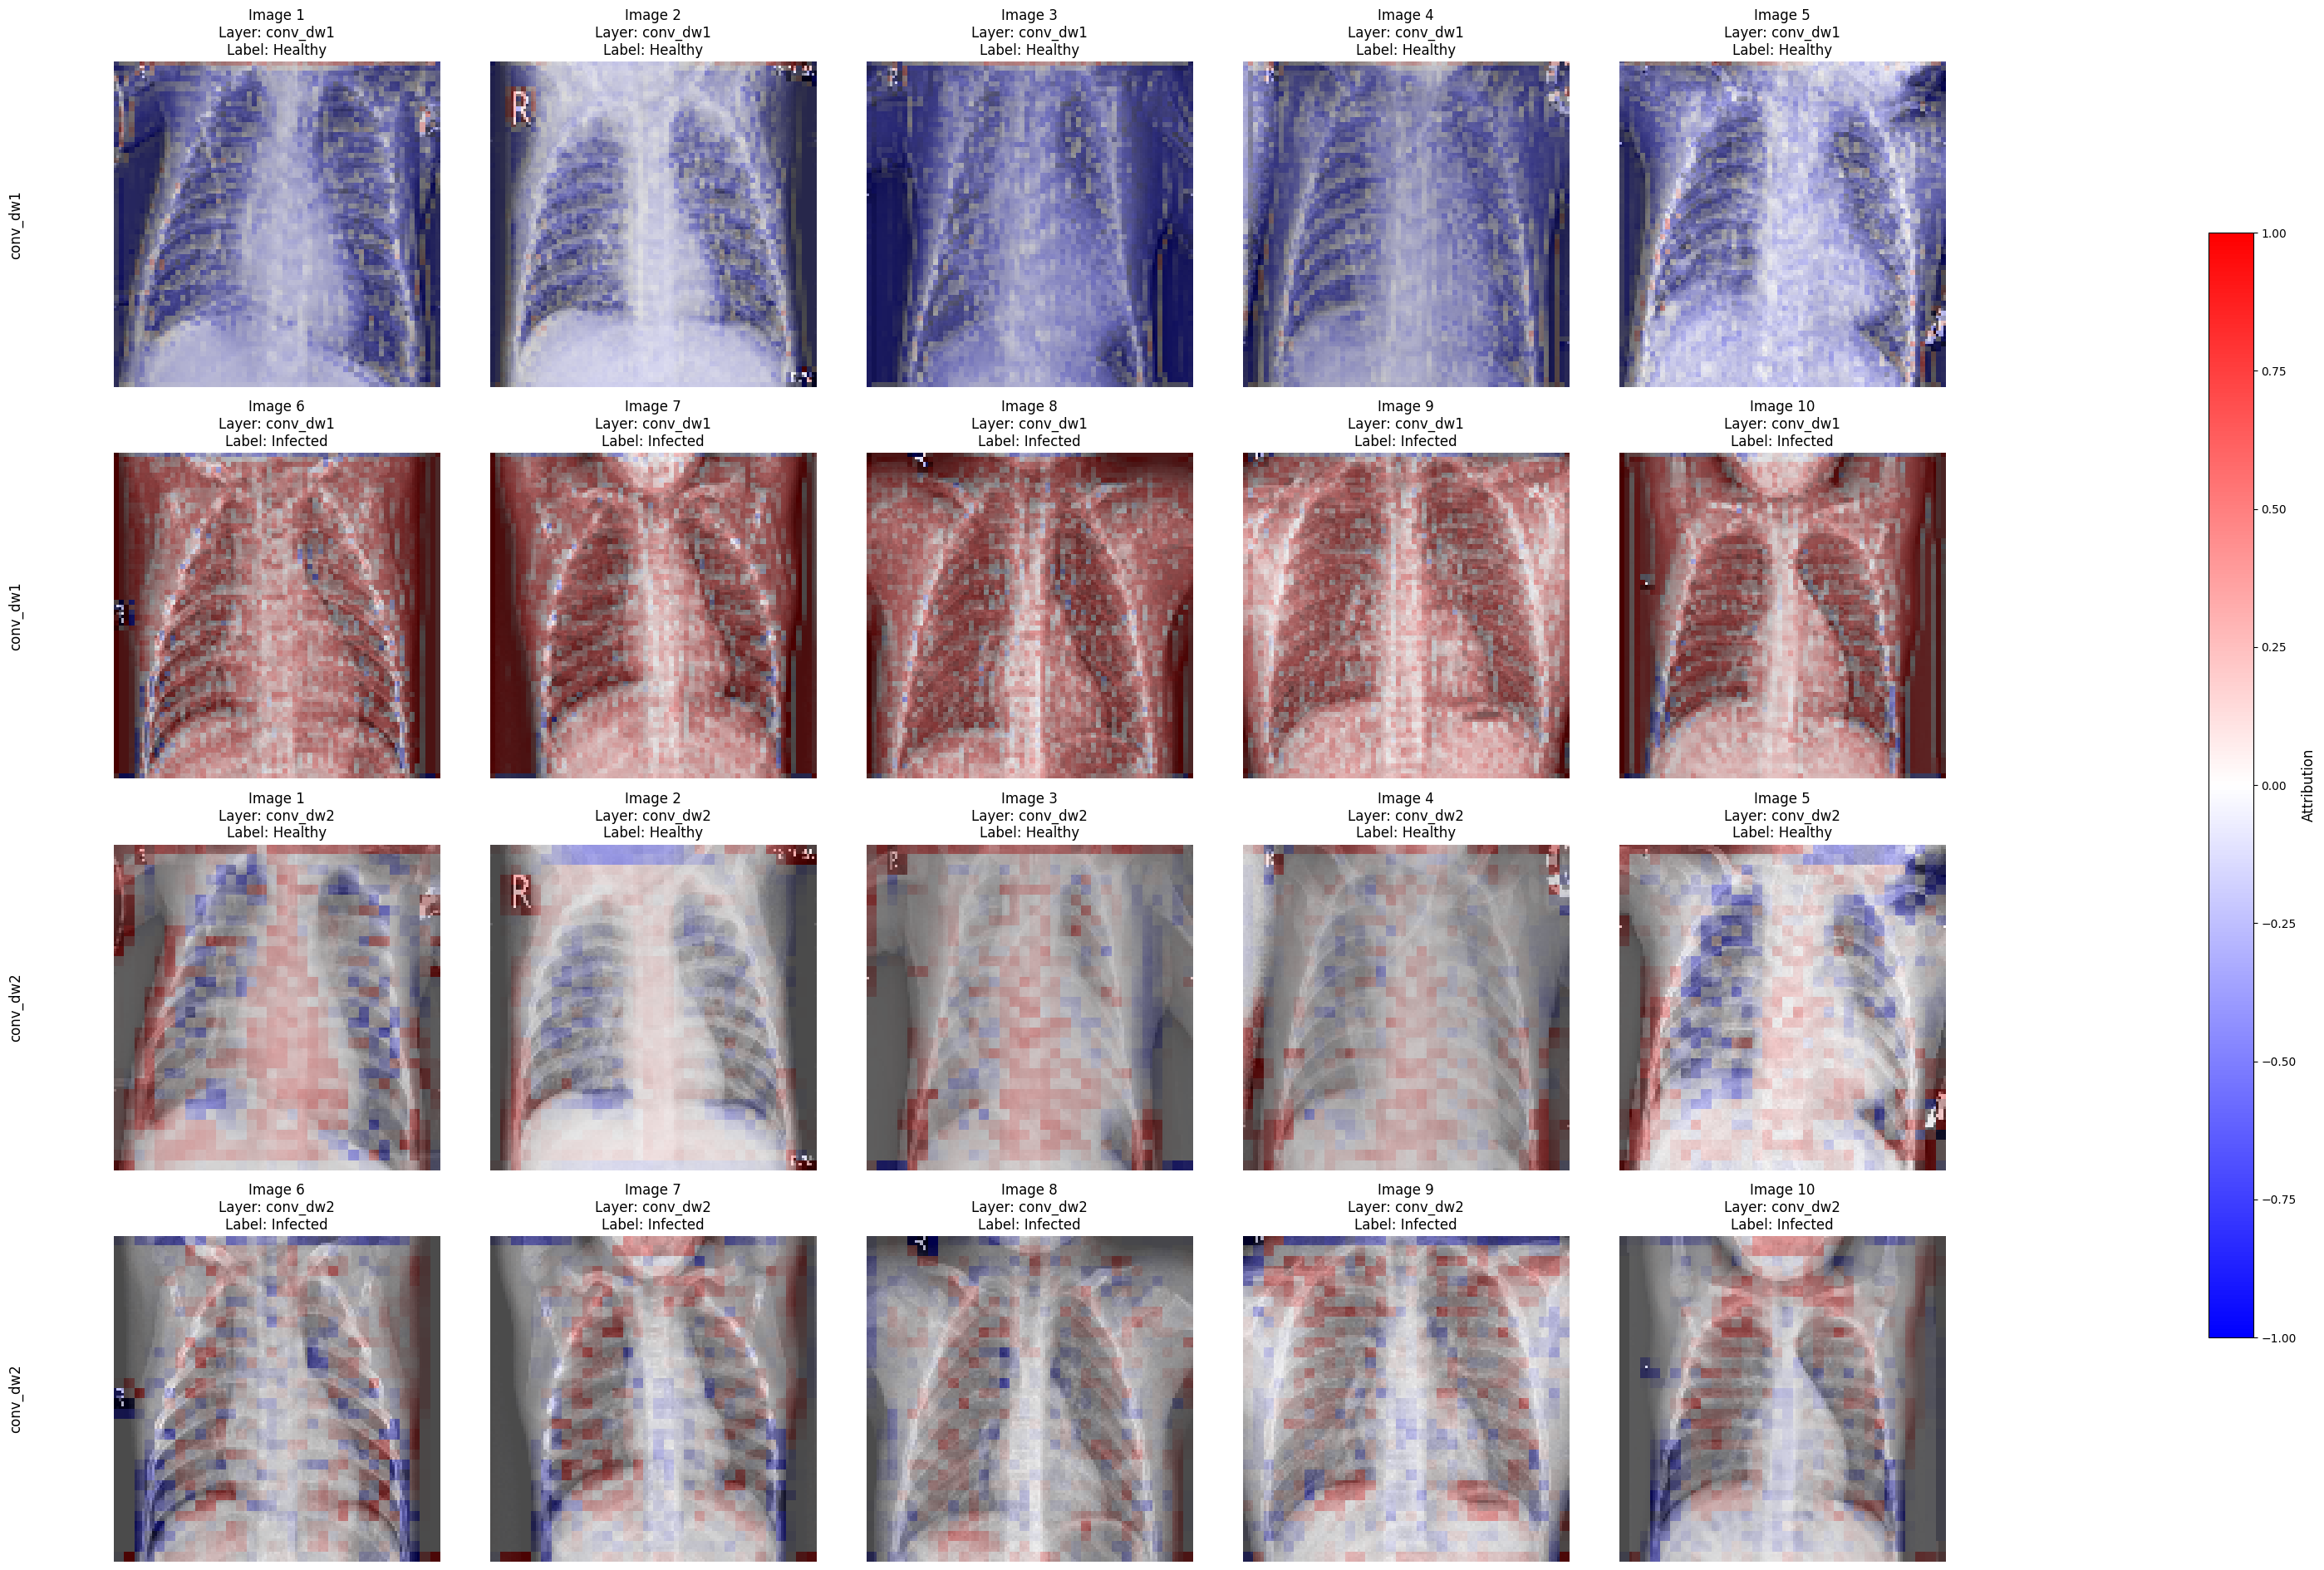

In [9]:
fig, axs = visualize_attributions_layer_panel(mobilenet_model, images, labels, ['conv_dw1', 'conv_dw2'])

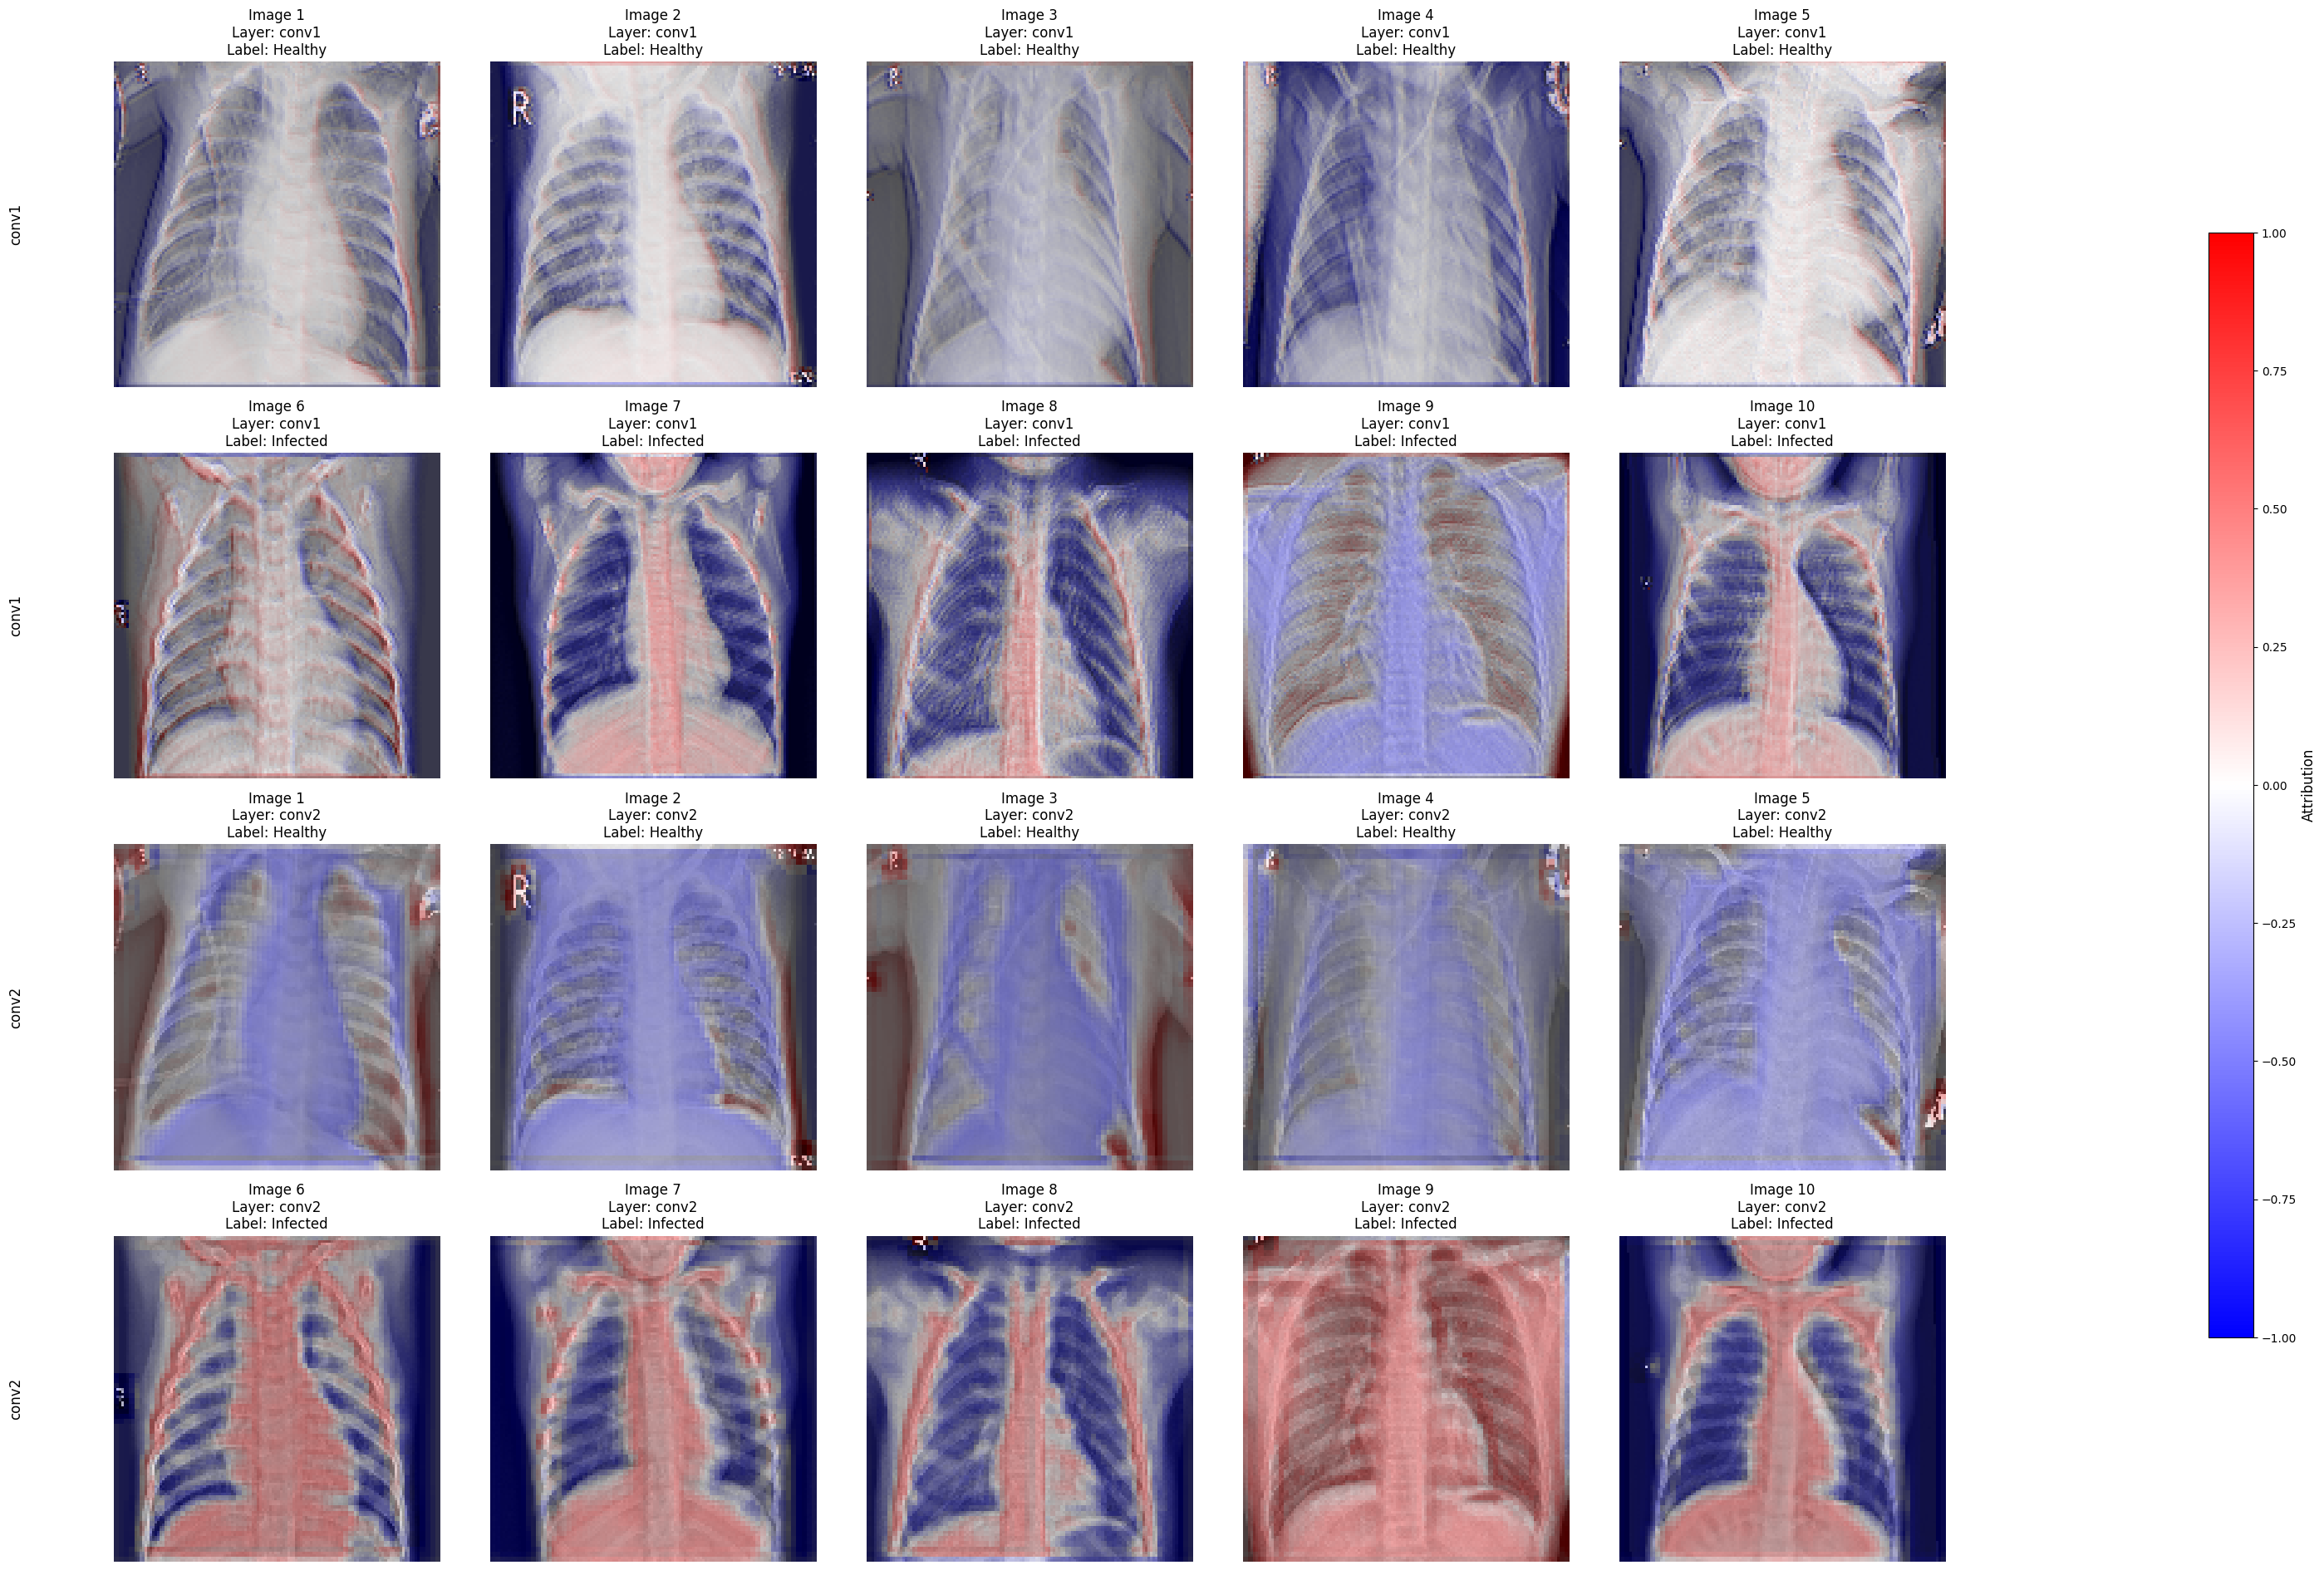

In [10]:
fig, axs = visualize_attributions_layer_panel(cnn_model, images, labels, ['conv1', 'conv2'])

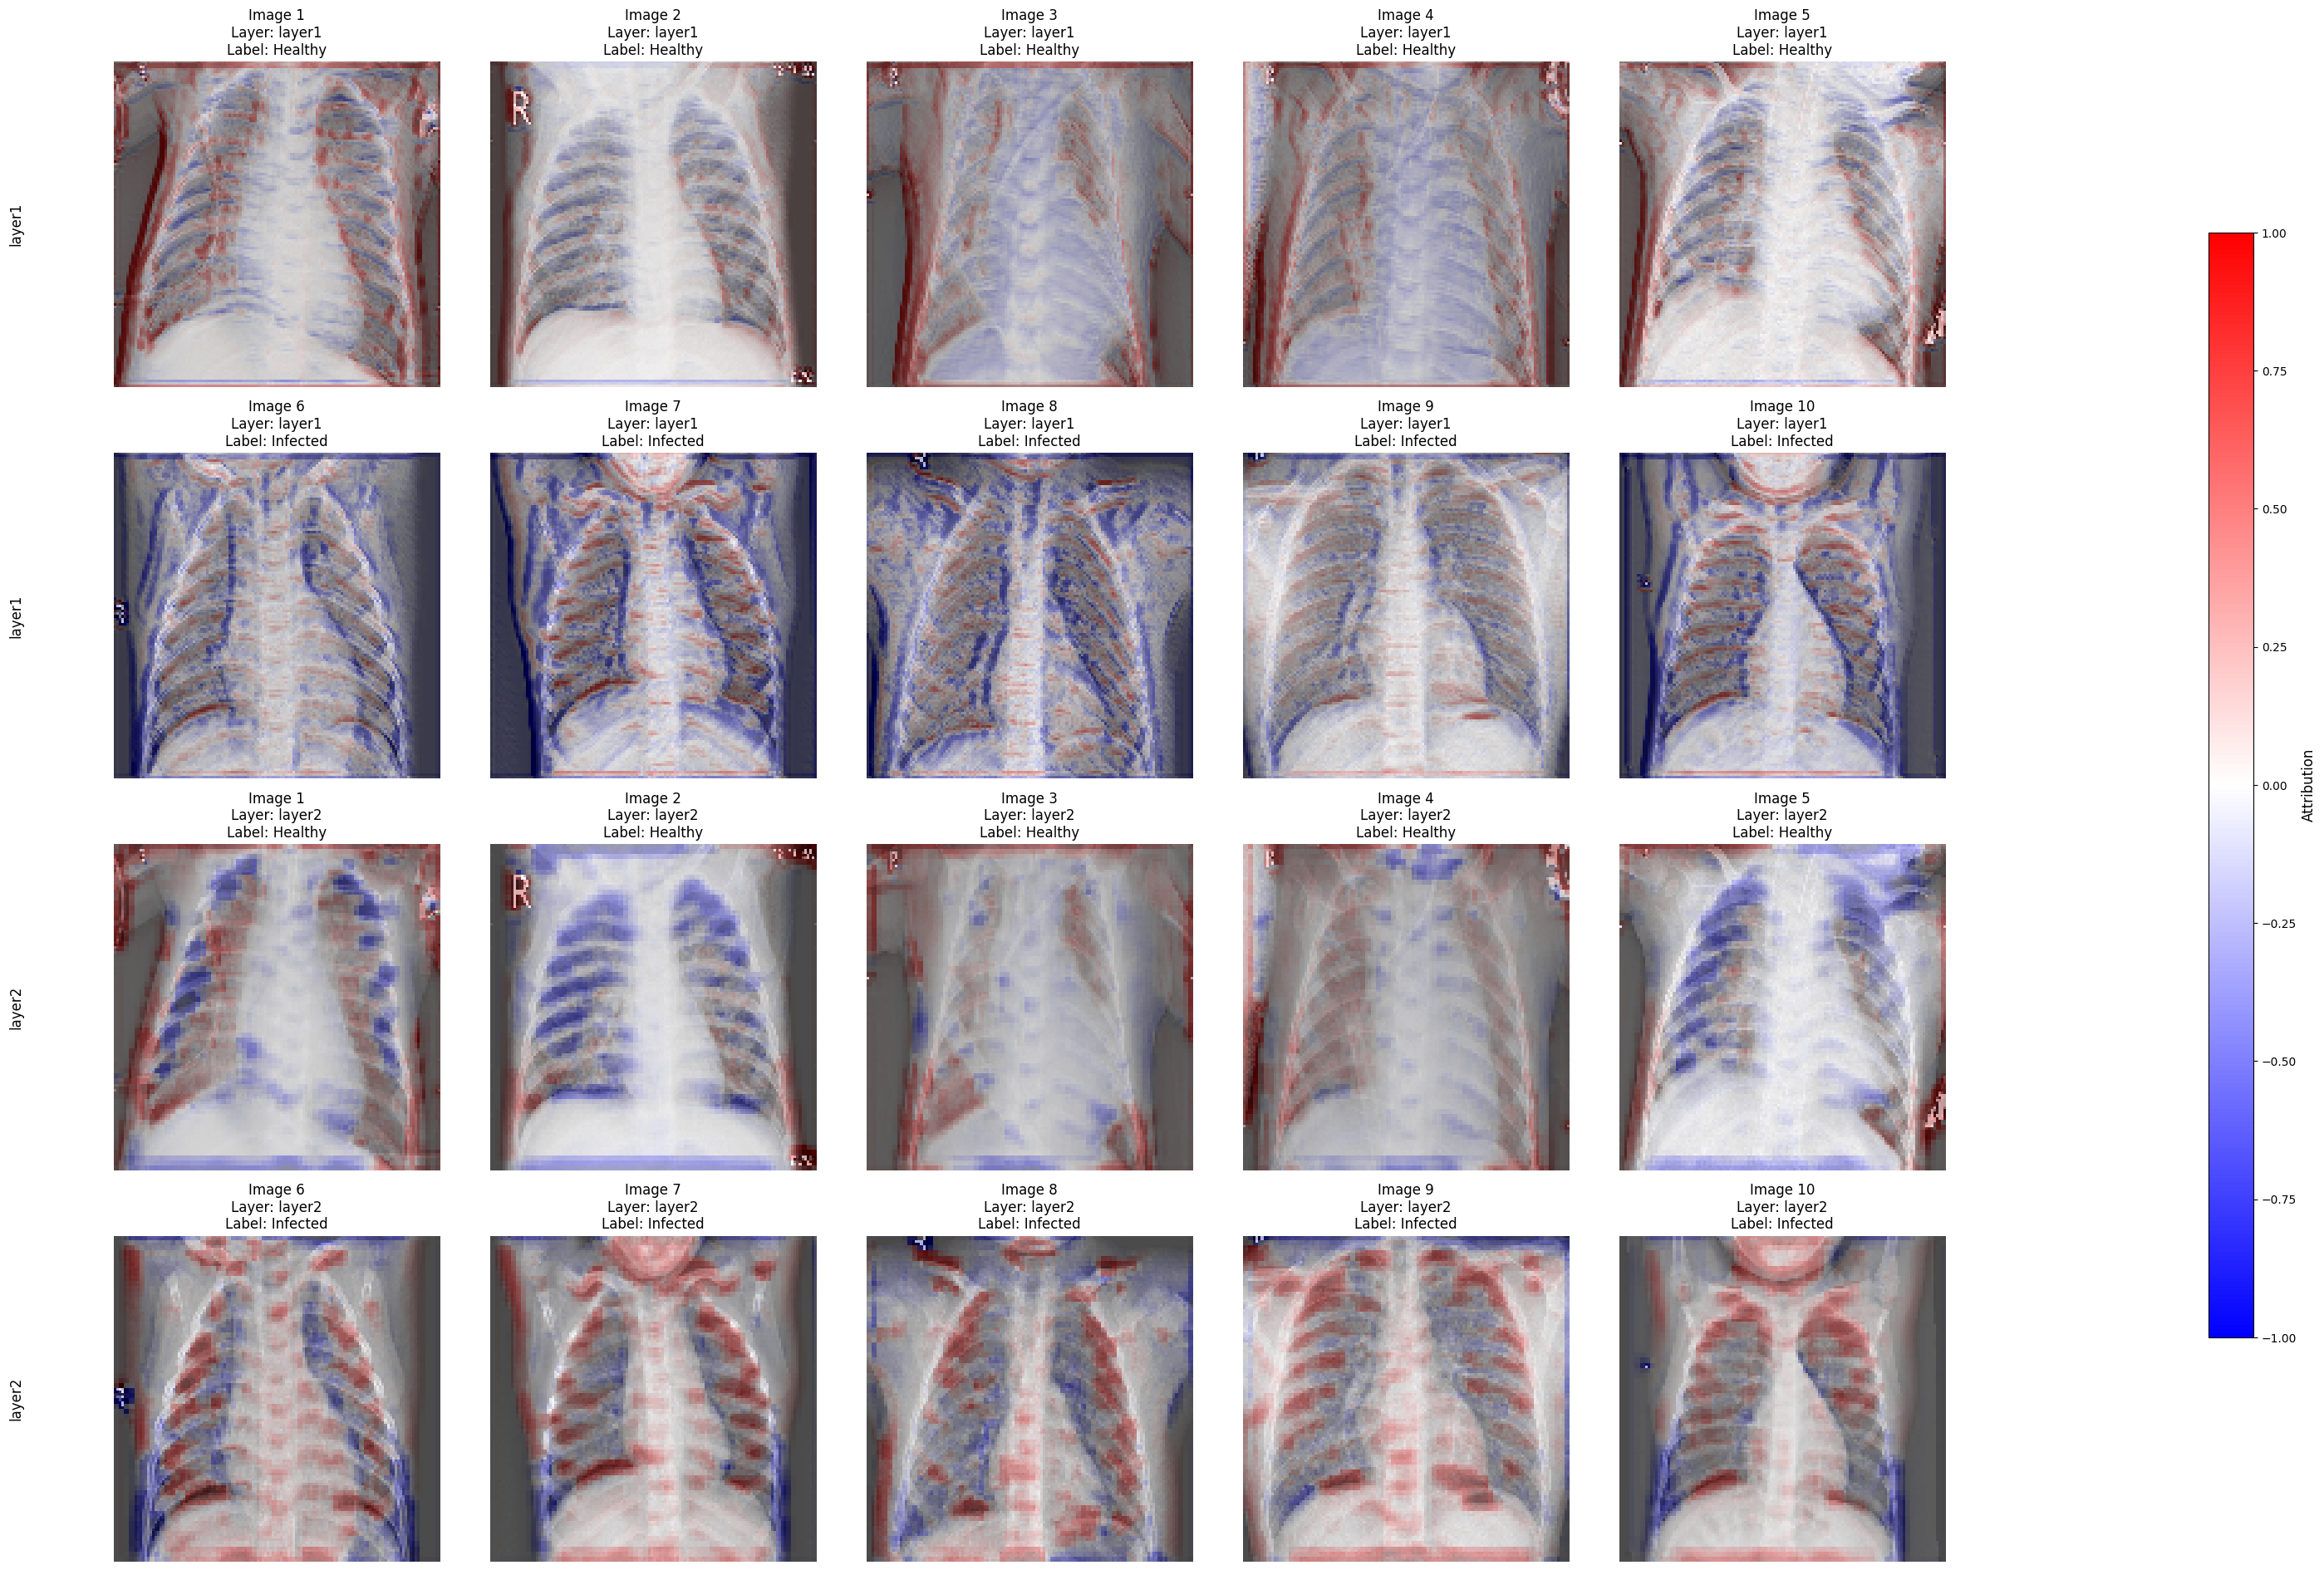

In [11]:
fig, axs = visualize_attributions_layer_panel(resnet_model, images, labels, ['layer1', 'layer2'])

### Sanity Check

In [ ]:
sample = np.random.choice(y_train, size=len(y_train), replace=True)
model, loss_list, acc_list = ShallowResNetClassification(X_train, sample, X_test, y_test, num_epochs = 1, learning_rate = 0.001, batch_size = 10, preprocess = False)